In [25]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
import random

<h3> En generell start <h3>

Et lite forord før du begynner å lese selve koden, vi har valgt å ta utgangspunkt i den utdelte artikkelens "yard sale" modell, vi har videre valgt å la kun 2 agenter trade per iterasjon og disse blir valgt tilfeldig for hver gang. Først lager vi funksjonen flipCoin som er ganske rett fram en 50/50 sjanse for å få True eller False, dette er det som bestemmer hvem som vinner eller taper.

In [26]:
def flipCoin():
    return random.choice([True,False])

#First we make a random win condition

for i in range(8):
    if flipCoin() == True:
        print("it is true")
    else:
        print("it is false")


    

it is false
it is false
it is true
it is false
it is false
it is false
it is false
it is true


### Boltzmannfunksjonen for $\Omega$ og funksjon for beregning av entropi

In [27]:
from math import factorial
from scipy.constants import k as kb



def boltzmann(N,nlist):
    Nfac = factorial(N)
    nfac = 1
    for elem in nlist:
        nfac *= factorial(elem)
    micro = Nfac/nfac
    return micro



def entropy(omega):
    #return kb * np.log(omega)
    return 1 * np.log(omega)

## First iteration of the tradingcode

Videre har vi i brakken under kodet den første versjonen av vår handelsmetode, men kun med 2 agenter. denne blir senere genralisert til en funksjon som vi kommer til å bli kjent med senere i dokumentet. Vi ser da at resultatet av trading loopen vår er at en av agentene vinner, men vi observerer også at gjennom statistisk "flaks" hvor en agent plutselig vinner n antall ganger på rad får et lite comeback. Vi har sett på eventuelle winconditions for å stoppe dette, vi har inkludert en, men vi er usikker på hvor mye en agents skal sitte med av systemverdien før de blir erklært som vinneren.

This is how many times the different agents have won the tradingbattle 1003,997


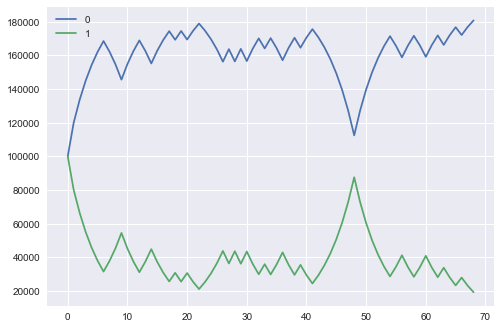

In [28]:
N = 5000
sKapital = 100000
agents = 2


"""
people = np.zeros((N,agents))
people[:] = np.NaN
people[0,:] = np.array([1000,1000])
systemwealth = np.sum(people[0,:])
"""

# counter for wins in individual trades
win0 = 0
win1 = 0
#counter for overall win
final0 = 0
final1 = 0



for j in range(2000): #Vi battler 20 ganger
    
    people = np.zeros((N,2))
    people[:] = np.NaN
    people[0,:] = np.array([sKapital,sKapital])
    systemwealth = np.sum(people[0,:])

  
    
    for i in range(N-1): #Dette er selve traden
        """
        Her sjekker vi om noen har vunnet, dersom en person vinner så legger vi til 1 på antall ganger vunnet,
        hvor mange ganger de har vunnet printes helt til slutt, vi antar at antall wins for begge to skal være relativt lik.
        
        """
        if people[i,0] >= 0.90*systemwealth:
            #print("breaktime 1")
            final0 +=1
            k = i
            break
        elif people[i,1] >= 0.90*systemwealth:
            #print("breaktime 2")
            final1 += 1
            k = i
            break

        
        #checking who has more wealth, the agent with least wealth becomes the basis for calculating loss or win.
        if people[i,0] < people[i,1]:
            w = people[i,0] # amount gambeled determined by the wealth of the poorest 
            normal = 0
            rich = 1
        elif people[i,0] > people[i,1]:
            w = people[i,1] 
            normal = 1
            rich = 0
        else: #equal wealth
            w = people[i,1]
            rich = 2
            normal = 1

        firstwins = flipCoin() # Returns who wins

        #normal wins
        if rich != 2 and (firstwins == True):
            people[i+1,normal] = people[i,normal] + 0.2 * w #loser
            people[i+1,rich] = people[i,rich] - 0.2 * w #winner



            #normal loses
        elif rich != 2 and (firstwins== False): 
            people[i+1,normal] = people[i,normal] - 0.17 * w #loser
            people[i+1,rich] = people[i,rich] + 0.17 * w #winner

            #they are equal, so no-one is rich or poor, but someone has to win.
        elif rich == 2 and (firstwins == True):
            people[i+1,0] = people[i,0] - 0.2 * w 
            people[i+1,1] = people[i,1] + 0.2 * w 
            
        elif rich == 2 and (firstwins == False):
            people[i+1,1] = people[i,1] - 0.2 * w 
            people[i+1,0] = people[i,0] + 0.2 * w 



    

    


#plotter selve resultatet
plt.plot(people[:,0],label = "0")

plt.plot(people[:,1], label = "1")
plt.legend()
print(f"This is how many times the different agents have won the tradingbattle {final0},{final1}")


Videre ser vi her at resultatet blir at en av de to agenten sitter igjen med alle pengene, en gang i blant kan man også observere et comeback som ikke egentlig passer inn i modellen, men siden vi ikke har en wincondition ferdig helt enda så må bare denne typen behaviour få oppstå. Vi antar også at siden de har 50/50 sjanse for å vinne hver trade at de burde vinne nesten like mange trade sekvenser, noe det virker som om de gjør utifra det som printes. De vinner ikke akkurat like mye, men nære nok.

## Making the code into a one time trading function with several agents

### Elector function

Videre vil vi gjerne utvikle dette til en funksjon slik at vi kan trade med flere agenter. Vi begynner da med å lage to nye funksjoner, funksjonen finder() returnerer et tilfeldig element fra en liste, funksjonen elector tar inn en liste of returnerer to elementer fra den listen. Dette brukes ved at vi velger ut indekser som sammsvarer med agenter, to indekser som er ulike blir valgt ut og de er de som skal trade.

In [29]:


def finder(listvar):
    """
    This just findes a random item from a list
    """
    return random.choice(listvar)

def elector(listvar):
    """
    Takes a list of numbers or agents, returnes two different agents who will then trade 
    """
    newlist = list.copy(listvar)
    agent1 = finder(newlist)
    newlist.remove(agent1)
    
    agent2 = finder(newlist)
    return [agent1, agent2]

agents2 = 5 # making a number of agents greater than 2

agentslist = [i for i in range(agents2)] # Making their indexes

#Printing the indexes then what the elector function outputs
print(agentslist)
elector(agentslist)


[0, 1, 2, 3, 4]


[3, 0]

### Traderfunction 

Videre bruker vi elector funksjonen samt trader loopen for å lage en traderfunksjon som vist under. Den fungerer enkelt og greit ved å ta inn en liste (eller tuple burde også fungere), av 2 verdier for så å utføre en trade med de verdiene, deretter returnerer den de nye verdiene. Videre lager vi en ny matrise med n antall agenter, vi lar dem trade over et vist antall iterasjoner og vi plotter resultatet samt printer hvor mange ganger de respektive agentene har handlet, vi vil ikke at noen av agentene våre skal handle mer enn andre, noe det virker som om de ikke gjør.

In [30]:
# Here we make the general function for a one time trade between two agents

def traderfunc(people):    
    peoplenew = [0,0]



        #checking who has more wealth, he is winner
    if people[0] < people[1]:
        w = people[0] #amount gambeled determined by the wealth of the poorest 
        normal = 0
        rich = 1
    elif people[0] > people[1]:
        w = people[1] 
        normal = 1
        rich = 0
    else: #equal wealth
        w = people[1]
        rich = 2
        normal = 1

    firstwins = flipCoin()

    #Normal wins
    if rich != 2 and (firstwins == True):
        peoplenew[normal] = people[normal] + 0.2 * w #loser
        peoplenew[rich] = people[rich] - 0.2 * w #winner



        #Normal loses
    elif rich != 2 and (firstwins== False): 
        peoplenew[normal] = people[normal] - 0.17 * w #loser
        peoplenew[rich] = people[rich] + 0.17 * w #winner

        # they are equal and number 1 wins
    elif rich == 2 and (firstwins == True):
        peoplenew[0] = people[0] - 0.2 * w 
        peoplenew[1] = people[1] + 0.2 * w 
        
        #they are equal and number 0 wins
    elif rich == 2 and (firstwins == False):
        peoplenew[1] = people[1] - 0.2 * w 
        peoplenew[0] = people[0] + 0.2 * w 
            
            
    return peoplenew


## Liberalistic system 

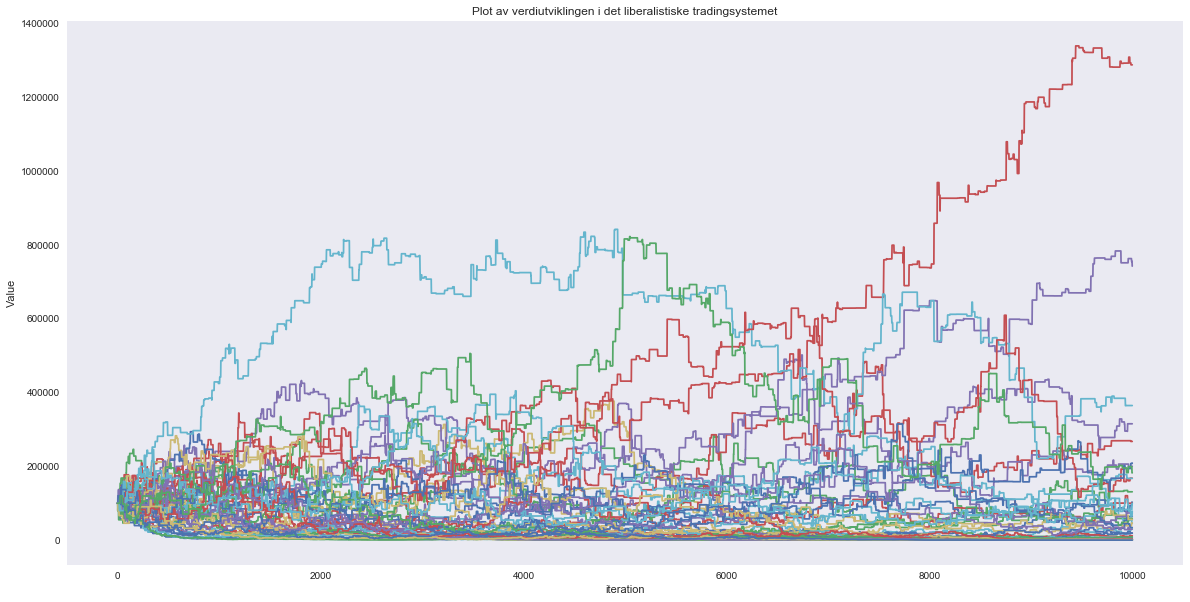

In [31]:
#Here we make the most general system, with no redistibution effects

sKapital = 100000 # start kapital
N = 10000 # number of iterations for the trading period
ant_agents = 50 # Number of agents present in our system

matrix = np.zeros((N,ant_agents)) # Making the agent matrix of dimention (N,number of agents)

# a for loop designed to fill inn the initial conditions
for i in range(ant_agents): 
    matrix[0,i] = sKapital
    
# Furthermore we create a list of the indexes to the corresponding agents
indexagents = [i for i in range(ant_agents)] 

counter = np.zeros(ant_agents) # This is designed to count how many times the different agents won



# The trade loop
for i in range(N-1):
    #Making sure that the previous value for the agents who dont trade is not lost
    matrix[i+1,:] = matrix[i,:] 

    #Electing two different agents to trade, then giving them their new value
    e1,e2 = elector(indexagents)
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]])
    matrix[i+1,e1] = newval1
    matrix[i+1,e2] = newval2

    #Filling the counter with who won
    counter[e1] +=1
    counter[e2] +=1
   
    

#Ploting the results

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")
plt.title("Plot av verdiutviklingen i det liberalistiske tradingsystemet")

for i in range(ant_agents):
    ax.plot(matrix[:,i])

Vi ser da at alle de som handler med hverandre her handler omlag like mye, videre ser vi enda klarere at her utvikler det seg et par eller en oligark. Det virker etter gjentatte tester at de fleste av agentene taper all verdi på "starten" også sitter noen folk igjen med mesteparten av systemverdien. Videre ser vi igjen at noen av agenetene utfører det statistiske mirakelet med å få et comeback. Dette kan enkelt unngås ved å legge inn en konkursfunksjon, men dette er vi ikke helt sikker på om vi vil inkludere enda, fordeler er at vi unngår statistiske mirkakel, ulempen er at mirakel i økonomien faktisk skjer og dette vil da utela den sjansen, videre utelar dette også flaks og "slump" som er en viktig del av liver. Dette med en wincondition og en konkurscondition skal diskuteres videre. Det vi eventuelt kan gjøre videre er å sette opp en fordelingsmodell, conditions for win og konkurs eller eventuelt prøve å sammenligne dette med fysikk.

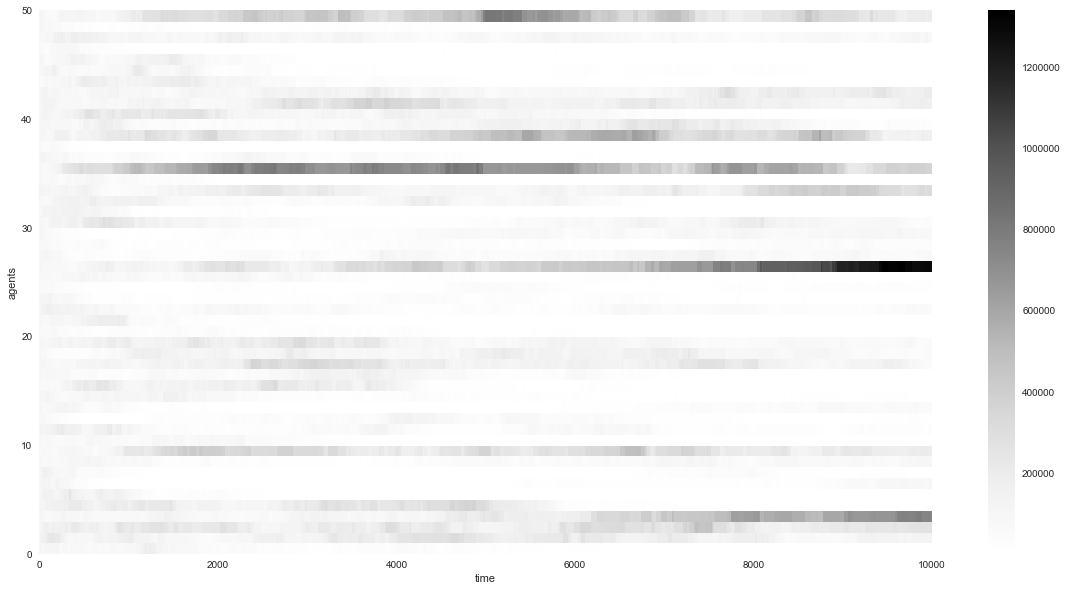

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
matrix_tr = np.transpose(matrix)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()

Let's check and see what the values look like at a certain iteration (400-401), rounding to the nearest int value:

In [39]:
display(np.rint(matrix[400:401]))

array([[ 81303., 109460., 219991.,  74155., 211822., 166945.,  38412.,
         84662., 103528., 106214.,  89597., 171260.,  18140., 119291.,
         78974., 180431.,  61126.,  74081.,  32174., 105845.,  38547.,
        106181., 133818.,  57291.,  32433.,  96493.,  55018.,  32172.,
         44835.,  21459., 166008., 155916., 142968., 105978.,  77668.,
        281562.,  49991.,  16956.,  87088.,  64424., 156175.,  94108.,
         83991., 111517.,  83647., 140078.,  91367., 187636.,  48386.,
        108874.]])

Now, we find out what each value is along with how many times it occurs:

In [40]:
unique, counts = np.unique(np.rint(matrix[400:401]), return_counts=True)
dict(zip(unique, counts))

{16956.0: 1,
 18140.0: 1,
 21459.0: 1,
 32172.0: 1,
 32174.0: 1,
 32433.0: 1,
 38412.0: 1,
 38547.0: 1,
 44835.0: 1,
 48386.0: 1,
 49991.0: 1,
 55018.0: 1,
 57291.0: 1,
 61126.0: 1,
 64424.0: 1,
 74081.0: 1,
 74155.0: 1,
 77668.0: 1,
 78974.0: 1,
 81303.0: 1,
 83647.0: 1,
 83991.0: 1,
 84662.0: 1,
 87088.0: 1,
 89597.0: 1,
 91367.0: 1,
 94108.0: 1,
 96493.0: 1,
 103528.0: 1,
 105845.0: 1,
 105978.0: 1,
 106181.0: 1,
 106214.0: 1,
 108874.0: 1,
 109460.0: 1,
 111517.0: 1,
 119291.0: 1,
 133818.0: 1,
 140078.0: 1,
 142968.0: 1,
 155916.0: 1,
 156175.0: 1,
 166008.0: 1,
 166945.0: 1,
 171260.0: 1,
 180431.0: 1,
 187636.0: 1,
 211822.0: 1,
 219991.0: 1,
 281562.0: 1}

[ 0  0 50  0  0  0  0  0  0  0]
[ 0  2 48  0  0  0  0  0  0  0]
[ 0  2 48  0  0  0  0  0  0  0]
[ 0  3 47  0  0  0  0  0  0  0]
[ 0  4 46  0  0  0  0  0  0  0]
[ 0  5 45  0  0  0  0  0  0  0]
[ 0  6 44  0  0  0  0  0  0  0]
[ 0  6 44  0  0  0  0  0  0  0]
[ 0  6 44  0  0  0  0  0  0  0]
[ 0  7 43  0  0  0  0  0  0  0]
[ 0  8 42  0  0  0  0  0  0  0]
[ 0  8 42  0  0  0  0  0  0  0]
[ 0  8 42  0  0  0  0  0  0  0]
[ 0  9 41  0  0  0  0  0  0  0]
[ 0 10 40  0  0  0  0  0  0  0]
[ 0 11 39  0  0  0  0  0  0  0]
[ 0 11 39  0  0  0  0  0  0  0]
[ 0 10 40  0  0  0  0  0  0  0]
[ 0  9 41  0  0  0  0  0  0  0]
[ 0  9 41  0  0  0  0  0  0  0]
[ 0  9 41  0  0  0  0  0  0  0]
[ 0  9 41  0  0  0  0  0  0  0]
[ 0  9 41  0  0  0  0  0  0  0]
[ 0 10 40  0  0  0  0  0  0  0]
[ 0 10 39  1  0  0  0  0  0  0]
[ 0 11 38  1  0  0  0  0  0  0]
[ 0 11 38  1  0  0  0  0  0  0]
[ 0 11 38  1  0  0  0  0  0  0]
[ 0 12 37  1  0  0  0  0  0  0]
[ 0 12 37  1  0  0  0  0  0  0]
[ 0 13 36  1  0  0  0  0  0  0]
[ 0 14 3

[15 15  9  4  4  2  1  0  0  0]
[15 15  9  4  4  2  1  0  0  0]
[15 15  9  4  4  2  1  0  0  0]
[15 15 10  3  4  2  1  0  0  0]
[14 16 10  3  4  2  1  0  0  0]
[14 16 10  3  4  2  1  0  0  0]
[14 16 10  3  4  2  1  0  0  0]
[14 17  9  3  3  3  1  0  0  0]
[14 17  9  3  3  3  1  0  0  0]
[14 17  9  3  3  3  1  0  0  0]
[14 17  9  3  2  4  1  0  0  0]
[14 17  9  3  2  4  1  0  0  0]
[14 17 10  2  2  4  1  0  0  0]
[14 17 10  2  2  4  1  0  0  0]
[13 18 10  2  2  4  1  0  0  0]
[12 19 10  2  2  4  1  0  0  0]
[12 19 10  2  2  4  1  0  0  0]
[12 19 10  2  2  4  1  0  0  0]
[12 18 11  2  2  4  1  0  0  0]
[13 17 11  2  2  4  1  0  0  0]
[13 17 11  2  2  4  1  0  0  0]
[13 17 11  2  2  4  1  0  0  0]
[13 16 12  2  2  4  1  0  0  0]
[12 17 12  2  2  4  1  0  0  0]
[12 17 12  2  2  4  1  0  0  0]
[12 17 12  2  2  4  1  0  0  0]
[12 17 12  2  3  3  1  0  0  0]
[12 17 12  2  3  3  1  0  0  0]
[13 16 12  2  3  3  1  0  0  0]
[13 16 12  2  3  3  1  0  0  0]
[13 16 11  3  3  3  1  0  0  0]
[13 16 1

[ 7 15 18  9  1  0  0  0  0  0]
[ 7 15 18  9  1  0  0  0  0  0]
[ 7 15 18  9  1  0  0  0  0  0]
[ 7 16 17  9  1  0  0  0  0  0]
[ 7 16 17  9  1  0  0  0  0  0]
[ 7 15 18  9  1  0  0  0  0  0]
[ 7 15 18  9  1  0  0  0  0  0]
[ 7 15 17 10  1  0  0  0  0  0]
[ 6 16 17 10  1  0  0  0  0  0]
[ 6 16 17 10  1  0  0  0  0  0]
[ 6 16 18  9  1  0  0  0  0  0]
[ 6 17 17  9  1  0  0  0  0  0]
[ 7 16 17  9  1  0  0  0  0  0]
[ 7 16 17  9  1  0  0  0  0  0]
[ 6 17 17  9  1  0  0  0  0  0]
[ 6 18 16  9  1  0  0  0  0  0]
[ 6 18 16  9  1  0  0  0  0  0]
[ 6 18 16  8  2  0  0  0  0  0]
[ 6 17 17  8  2  0  0  0  0  0]
[ 6 17 17  8  2  0  0  0  0  0]
[ 6 17 17  8  2  0  0  0  0  0]
[ 6 17 17  8  2  0  0  0  0  0]
[ 6 17 17  8  2  0  0  0  0  0]
[ 6 18 16  8  2  0  0  0  0  0]
[ 6 18 16  8  2  0  0  0  0  0]
[ 7 17 16  7  3  0  0  0  0  0]
[ 7 17 16  7  3  0  0  0  0  0]
[ 7 17 16  7  3  0  0  0  0  0]
[ 7 17 16  7  3  0  0  0  0  0]
[ 7 17 16  7  3  0  0  0  0  0]
[ 7 17 16  7  3  0  0  0  0  0]
[ 7 17 1

[14 15  9  6  4  1  1  0  0  0]
[14 15  9  6  4  1  1  0  0  0]
[14 15  9  6  4  1  1  0  0  0]
[14 16  8  6  4  1  1  0  0  0]
[14 16  8  6  4  1  1  0  0  0]
[14 15  9  6  4  1  1  0  0  0]
[14 15  9  6  4  1  1  0  0  0]
[14 15  8  7  4  1  1  0  0  0]
[14 15  8  8  3  1  1  0  0  0]
[14 15  8  8  2  2  1  0  0  0]
[14 15  8  8  2  2  1  0  0  0]
[14 15  8  8  1  3  1  0  0  0]
[14 15  8  8  1  3  1  0  0  0]
[14 15  8  8  1  3  1  0  0  0]
[14 15  8  8  1  3  1  0  0  0]
[14 15  8  8  1  3  1  0  0  0]
[14 15  8  7  3  2  1  0  0  0]
[14 15  8  7  3  2  1  0  0  0]
[14 15  9  6  3  2  1  0  0  0]
[14 15  9  6  3  2  1  0  0  0]
[15 14  9  6  3  2  1  0  0  0]
[15 14 10  5  3  2  1  0  0  0]
[15 14 10  5  3  2  1  0  0  0]
[15 13 11  5  3  2  1  0  0  0]
[15 13 11  5  3  2  1  0  0  0]
[15 12 12  5  3  2  1  0  0  0]
[15 12 12  5  3  2  1  0  0  0]
[15 12 12  5  3  2  1  0  0  0]
[15 12 12  5  3  2  1  0  0  0]
[15 12 12  5  3  2  1  0  0  0]
[15 12 12  5  3  2  1  0  0  0]
[15 12 1

[ 6 25  8  7  3  0  1  0  0  0]
[ 6 24  9  7  3  0  1  0  0  0]
[ 6 24  9  7  3  0  1  0  0  0]
[ 6 25  8  7  3  0  1  0  0  0]
[ 6 24  9  7  3  0  1  0  0  0]
[ 6 24  9  7  3  0  1  0  0  0]
[ 6 24  9  7  3  0  1  0  0  0]
[ 7 23  9  7  3  0  1  0  0  0]
[ 7 22 10  7  3  0  1  0  0  0]
[ 7 22 10  7  3  0  1  0  0  0]
[ 7 22 10  7  3  0  1  0  0  0]
[ 7 22 10  8  2  0  1  0  0  0]
[ 7 22 10  8  2  0  1  0  0  0]
[ 7 22 10  8  2  0  1  0  0  0]
[ 7 21 11  8  2  0  1  0  0  0]
[ 7 21 11  8  2  0  1  0  0  0]
[ 7 20 12  8  2  0  1  0  0  0]
[ 7 20 13  7  1  1  1  0  0  0]
[ 6 22 12  7  1  1  1  0  0  0]
[ 6 22 12  7  1  1  1  0  0  0]
[ 7 21 12  7  1  1  1  0  0  0]
[ 6 22 12  7  1  1  1  0  0  0]
[ 5 23 12  7  1  1  1  0  0  0]
[ 5 22 13  7  1  1  1  0  0  0]
[ 6 21 13  7  1  1  1  0  0  0]
[ 6 21 13  7  1  1  1  0  0  0]
[ 6 21 13  7  1  1  1  0  0  0]
[ 6 20 14  7  1  1  1  0  0  0]
[ 6 20 14  7  1  1  1  0  0  0]
[ 7 19 14  7  1  1  1  0  0  0]
[ 7 19 14  7  1  1  1  0  0  0]
[ 7 19 1

[13 17  5  7  6  2  0  0  0  0]
[13 17  5  7  6  2  0  0  0  0]
[13 17  5  7  6  2  0  0  0  0]
[13 17  5  7  6  2  0  0  0  0]
[13 17  5  7  6  2  0  0  0  0]
[12 18  5  7  6  2  0  0  0  0]
[12 18  5  7  5  3  0  0  0  0]
[12 18  5  7  5  3  0  0  0  0]
[12 18  6  6  5  3  0  0  0  0]
[12 18  6  6  5  3  0  0  0  0]
[12 18  6  6  5  3  0  0  0  0]
[12 18  6  7  4  3  0  0  0  0]
[12 18  6  7  4  3  0  0  0  0]
[12 18  6  7  4  3  0  0  0  0]
[12 18  6  7  4  3  0  0  0  0]
[12 18  6  7  4  3  0  0  0  0]
[12 18  6  7  4  3  0  0  0  0]
[12 18  6  7  4  3  0  0  0  0]
[12 19  5  7  4  3  0  0  0  0]
[12 19  5  7  5  2  0  0  0  0]
[11 20  5  7  5  2  0  0  0  0]
[11 20  5  7  5  2  0  0  0  0]
[11 19  6  7  5  2  0  0  0  0]
[11 19  6  7  5  2  0  0  0  0]
[11 19  6  7  5  2  0  0  0  0]
[11 19  6  7  4  3  0  0  0  0]
[11 19  6  7  4  3  0  0  0  0]
[11 19  6  7  4  3  0  0  0  0]
[11 19  6  7  5  2  0  0  0  0]
[11 19  7  6  5  2  0  0  0  0]
[11 20  5  7  5  2  0  0  0  0]
[11 20  

[ 9 19 13  3  3  3  0  0  0  0]
[ 9 19 13  3  3  3  0  0  0  0]
[ 9 20 12  3  3  3  0  0  0  0]
[ 9 19 13  3  3  3  0  0  0  0]
[ 9 19 13  3  3  3  0  0  0  0]
[ 9 19 13  3  3  3  0  0  0  0]
[ 9 19 13  2  4  3  0  0  0  0]
[ 9 19 13  2  4  3  0  0  0  0]
[ 9 19 13  2  4  3  0  0  0  0]
[ 9 19 13  2  4  3  0  0  0  0]
[ 9 19 13  2  4  3  0  0  0  0]
[ 9 19 13  2  4  3  0  0  0  0]
[10 18 13  2  4  3  0  0  0  0]
[10 18 13  2  4  3  0  0  0  0]
[10 18 13  2  4  3  0  0  0  0]
[11 17 13  2  4  3  0  0  0  0]
[11 18 12  2  4  3  0  0  0  0]
[11 17 13  2  4  3  0  0  0  0]
[11 17 13  2  4  3  0  0  0  0]
[11 17 13  2  4  3  0  0  0  0]
[11 18 12  2  4  3  0  0  0  0]
[11 18 12  2  4  3  0  0  0  0]
[11 18 12  2  4  3  0  0  0  0]
[11 17 14  1  4  3  0  0  0  0]
[11 16 15  1  4  3  0  0  0  0]
[11 16 15  1  4  3  0  0  0  0]
[11 16 15  1  4  3  0  0  0  0]
[11 16 15  1  4  3  0  0  0  0]
[10 17 15  1  4  3  0  0  0  0]
[10 17 15  1  4  3  0  0  0  0]
[10 17 14  3  3  3  0  0  0  0]
[10 17 1

[18 10 11  5  3  1  1  1  0  0]
[18 10 12  4  3  1  1  1  0  0]
[18 11 11  3  4  1  1  1  0  0]
[18 11 11  3  4  1  1  1  0  0]
[18 11 11  3  4  1  1  1  0  0]
[17 12 11  4  3  1  1  1  0  0]
[17 13  9  5  3  1  1  1  0  0]
[17 13 10  3  4  1  1  1  0  0]
[16 14 10  3  4  1  1  1  0  0]
[16 14 10  2  5  1  1  1  0  0]
[16 14 10  1  6  1  1  1  0  0]
[16 14 10  1  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 14  9  2  6  1  1  1  0  0]
[16 15  8  2  6  1  1  1  0  0]
[16 15  8  2  6  1  1  1  0  0]
[16 15  8  3  5  0  2  1  0  0]
[16 15  7  4  5  0  2  1  0  0]
[16 15  

[ 9 18 11  7  5  0  0  0  0  0]
[10 17 11  7  5  0  0  0  0  0]
[10 18 10  7  5  0  0  0  0  0]
[10 18 10  8  4  0  0  0  0  0]
[10 18  9  9  4  0  0  0  0  0]
[10 18  8 10  4  0  0  0  0  0]
[10 18  9  9  4  0  0  0  0  0]
[10 18  9  9  4  0  0  0  0  0]
[11 17  9  9  4  0  0  0  0  0]
[10 18  9 10  3  0  0  0  0  0]
[10 18  9 10  3  0  0  0  0  0]
[10 18  9 10  3  0  0  0  0  0]
[10 18  9 10  3  0  0  0  0  0]
[10 17 10 10  3  0  0  0  0  0]
[10 17 10 10  3  0  0  0  0  0]
[10 17 10 10  3  0  0  0  0  0]
[10 17 10 10  3  0  0  0  0  0]
[10 17 10  9  4  0  0  0  0  0]
[10 18  9  9  3  1  0  0  0  0]
[10 18  9  9  3  1  0  0  0  0]
[10 18  9  9  3  1  0  0  0  0]
[10 17 10  9  3  1  0  0  0  0]
[10 17 10  9  3  1  0  0  0  0]
[10 17 11  7  4  1  0  0  0  0]
[10 17 10  8  4  1  0  0  0  0]
[10 17 10  8  5  0  0  0  0  0]
[ 9 18 10  8  5  0  0  0  0  0]
[ 9 18 10  8  5  0  0  0  0  0]
[ 9 18 11  7  4  1  0  0  0  0]
[ 9 18 11  7  4  1  0  0  0  0]
[ 9 18 12  6  4  1  0  0  0  0]
[10 17 1

[ 1 24 20  5  0  0  0  0  0  0]
[ 1 24 20  5  0  0  0  0  0  0]
[ 1 24 19  6  0  0  0  0  0  0]
[ 1 24 19  6  0  0  0  0  0  0]
[ 1 24 19  6  0  0  0  0  0  0]
[ 2 23 19  6  0  0  0  0  0  0]
[ 2 23 19  6  0  0  0  0  0  0]
[ 2 22 20  6  0  0  0  0  0  0]
[ 2 22 20  6  0  0  0  0  0  0]
[ 2 22 20  5  1  0  0  0  0  0]
[ 2 22 20  5  1  0  0  0  0  0]
[ 2 21 21  5  1  0  0  0  0  0]
[ 2 21 21  5  1  0  0  0  0  0]
[ 2 21 21  5  1  0  0  0  0  0]
[ 2 21 22  4  1  0  0  0  0  0]
[ 3 20 22  4  1  0  0  0  0  0]
[ 4 19 22  4  1  0  0  0  0  0]
[ 4 19 22  4  1  0  0  0  0  0]
[ 4 19 22  4  1  0  0  0  0  0]
[ 4 19 23  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 19 22  3  1  0  0  0  0  0]
[ 5 19 22  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 18 23  3  1  0  0  0  0  0]
[ 5 18 2

[15 16  7  5  4  1  2  0  0  0]
[15 16  7  5  4  1  2  0  0  0]
[15 17  6  5  4  1  2  0  0  0]
[15 17  6  5  4  1  2  0  0  0]
[15 17  6  5  3  2  2  0  0  0]
[15 17  6  5  3  2  2  0  0  0]
[14 18  6  5  3  2  2  0  0  0]
[14 18  6  5  3  2  2  0  0  0]
[14 18  6  5  3  2  2  0  0  0]
[14 17  7  5  3  2  2  0  0  0]
[14 16  9  4  3  2  2  0  0  0]
[14 16  9  4  3  2  2  0  0  0]
[14 16  9  4  3  2  2  0  0  0]
[14 16 10  3  3  2  2  0  0  0]
[14 16 10  3  3  2  2  0  0  0]
[14 16 10  3  3  2  2  0  0  0]
[14 16 10  3  3  2  2  0  0  0]
[14 16 10  3  3  2  2  0  0  0]
[14 15 11  3  3  2  2  0  0  0]
[14 16  9  4  3  2  2  0  0  0]
[14 16  9  4  3  2  2  0  0  0]
[13 17  9  4  3  2  2  0  0  0]
[13 17  9  4  3  2  2  0  0  0]
[13 17  9  4  3  2  2  0  0  0]
[13 17  9  4  3  2  2  0  0  0]
[13 17  9  4  3  2  2  0  0  0]
[13 17  9  4  3  2  2  0  0  0]
[13 17  9  3  4  2  2  0  0  0]
[12 19  8  3  4  2  2  0  0  0]
[12 19  8  3  4  2  2  0  0  0]
[12 20  7  3  4  2  2  0  0  0]
[12 20  

[ 1 27 15  5  1  1  0  0  0  0]
[ 1 27 15  5  1  1  0  0  0  0]
[ 1 27 15  5  1  1  0  0  0  0]
[ 1 27 15  5  1  1  0  0  0  0]
[ 1 27 15  5  1  1  0  0  0  0]
[ 1 28 14  5  1  1  0  0  0  0]
[ 1 28 14  5  1  1  0  0  0  0]
[ 1 27 16  4  1  1  0  0  0  0]
[ 1 27 16  4  1  1  0  0  0  0]
[ 1 27 16  4  1  1  0  0  0  0]
[ 1 27 16  4  1  1  0  0  0  0]
[ 1 27 16  4  1  1  0  0  0  0]
[ 1 26 17  4  1  1  0  0  0  0]
[ 1 26 17  4  1  1  0  0  0  0]
[ 1 26 17  4  1  1  0  0  0  0]
[ 1 25 18  4  1  1  0  0  0  0]
[ 2 24 17  5  1  1  0  0  0  0]
[ 2 24 18  4  1  1  0  0  0  0]
[ 2 23 19  4  1  1  0  0  0  0]
[ 2 23 19  4  1  1  0  0  0  0]
[ 2 23 19  4  1  1  0  0  0  0]
[ 2 23 19  4  1  1  0  0  0  0]
[ 2 24 17  5  1  1  0  0  0  0]
[ 3 23 17  5  1  1  0  0  0  0]
[ 3 23 17  5  1  1  0  0  0  0]
[ 3 24 16  5  1  1  0  0  0  0]
[ 4 23 16  5  1  1  0  0  0  0]
[ 4 23 16  5  1  1  0  0  0  0]
[ 4 24 15  5  1  1  0  0  0  0]
[ 4 24 15  5  1  1  0  0  0  0]
[ 4 24 15  5  1  1  0  0  0  0]
[ 4 23 1

[10 20  6  7  5  1  1  0  0  0]
[10 19  7  7  5  1  1  0  0  0]
[10 20  6  7  5  1  1  0  0  0]
[10 20  6  7  5  1  1  0  0  0]
[10 20  6  7  5  1  1  0  0  0]
[10 20  6  7  5  1  1  0  0  0]
[10 20  6  7  5  1  1  0  0  0]
[10 20  7  6  5  1  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[10 20  7  6  6  0  1  0  0  0]
[11 19  7  6  6  0  1  0  0  0]
[11 19  7  6  6  0  1  0  0  0]
[11 19  7  6  6  0  1  0  0  0]
[11 20  6  6  6  0  1  0  0  0]
[11 20  6  6  6  0  1  0  0  0]
[11 20  6  6  6  0  1  0  0  0]
[11 20  6  6  6  0  1  0  0  0]
[11 20  6  6  6  0  1  0  0  0]
[11 19  7  6  6  0  1  0  0  0]
[11 19  7  6  6  0  1  0  0  0]
[11 19  7  6  6  0  1  0  0  0]
[11 18  8  7  5  0  1  0  0  0]
[11 18  

[ 3 25 11 10  1  0  0  0  0  0]
[ 3 25 11 10  1  0  0  0  0  0]
[ 3 25 11 10  1  0  0  0  0  0]
[ 3 25 10 11  1  0  0  0  0  0]
[ 4 24 10 11  1  0  0  0  0  0]
[ 4 24 10 11  1  0  0  0  0  0]
[ 5 22 11 11  1  0  0  0  0  0]
[ 5 22 12 10  1  0  0  0  0  0]
[ 5 22 12 10  1  0  0  0  0  0]
[ 5 21 13 10  1  0  0  0  0  0]
[ 5 21 12 11  1  0  0  0  0  0]
[ 6 20 12 11  1  0  0  0  0  0]
[ 6 20 12 11  1  0  0  0  0  0]
[ 6 20 12 11  1  0  0  0  0  0]
[ 6 20 12 11  1  0  0  0  0  0]
[ 6 20 12 11  1  0  0  0  0  0]
[ 6 20 12 11  1  0  0  0  0  0]
[ 7 19 11 12  1  0  0  0  0  0]
[ 7 19 10 13  1  0  0  0  0  0]
[ 7 19 11 12  1  0  0  0  0  0]
[ 7 19 12 11  1  0  0  0  0  0]
[ 7 19 12 11  1  0  0  0  0  0]
[ 7 18 13 11  1  0  0  0  0  0]
[ 7 18 13 11  1  0  0  0  0  0]
[ 7 19 12 11  1  0  0  0  0  0]
[ 7 19 12 11  1  0  0  0  0  0]
[ 7 19 12 11  1  0  0  0  0  0]
[ 7 19 13 10  1  0  0  0  0  0]
[ 7 19 13 10  1  0  0  0  0  0]
[ 7 19 13 10  1  0  0  0  0  0]
[ 8 18 13 10  1  0  0  0  0  0]
[ 8 19 1

[11 18  7  7  6  1  0  0  0  0]
[11 18  7  7  6  1  0  0  0  0]
[11 18  7  7  6  1  0  0  0  0]
[11 18  8  6  6  1  0  0  0  0]
[11 18  8  6  6  1  0  0  0  0]
[11 18  8  6  6  1  0  0  0  0]
[11 18  8  6  6  1  0  0  0  0]
[11 18  8  6  6  1  0  0  0  0]
[11 18  8  6  6  1  0  0  0  0]
[11 18  8  6  6  1  0  0  0  0]
[12 17  8  6  6  1  0  0  0  0]
[12 17  8  6  6  1  0  0  0  0]
[12 17  8  6  6  1  0  0  0  0]
[12 17  8  6  6  1  0  0  0  0]
[12 17  8  7  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[12 17  9  6  4  2  0  0  0  0]
[11 18  9  6  4  2  0  0  0  0]
[11 18  9  6  4  2  0  0  0  0]
[11 18  9  6  4  2  0  0  0  0]
[11 18 10  5  4  2  0  0  0  0]
[11 18 10  5  4  2  0  0  0  0]
[11 18 10  5  3  3  0  0  0  0]
[11 18  9  6  3  3  0  0  0  0]
[11 18  

[15 18  5  4  5  1  0  1  1  0]
[16 17  5  4  5  1  0  1  1  0]
[16 17  5  4  5  1  0  1  1  0]
[16 17  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[16 17  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  5  1  0  1  1  0]
[17 16  5  4  4  2  1  0  1  0]
[17 15  6  4  4  2  1  0  1  0]
[17 15  6  5  3  2  1  0  1  0]
[17 16  5  5  3  2  1  0  1  0]
[17 16  5  5  3  2  1  0  1  0]
[17 16  5  5  3  2  1  0  1  0]
[18 15  5  5  3  2  1  0  1  0]
[18 15  5  5  3  2  1  0  1  0]
[18 15  5  5  3  2  1  0  1  0]
[18 15  5  5  3  2  1  0  1  0]
[18 15  5  5  3  2  1  0  1  0]
[18 15  5  5  3  2  1  0  1  0]
[18 15  5  5  3  2  1  0  1  0]
[17 16  5  5  3  2  1  0  1  0]
[17 16  5  5  3  2  1  0  1  0]
[17 16  5  6  1  3  1  0  1  0]
[17 16  

[12 15  9  9  3  2  0  0  0  0]
[12 15  9  9  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 16 10  8  3  2  0  0  0  0]
[11 15 11  8  3  2  0  0  0  0]
[11 15 11  8  3  2  0  0  0  0]
[11 15 11  8  3  2  0  0  0  0]
[11 15 11  8  3  2  0  0  0  0]
[11 15 11  8  4  1  0  0  0  0]
[11 16 10  8  4  1  0  0  0  0]
[11 16 10  8  4  1  0  0  0  0]
[11 16  9  9  4  1  0  0  0  0]
[11 17  8  9  4  1  0  0  0  0]
[11 17  8  9  4  1  0  0  0  0]
[11 17  8 10  3  1  0  0  0  0]
[11 17  8 10  3  1  0  0  0  0]
[11 17  8 11  1  2  0  0  0  0]
[10 18  8 11  1  2  0  0  0  0]
[10 18  8 11  1  2  0  0  0  0]
[10 18  8 11  1  2  0  0  0  0]
[10 18  8 11  1  2  0  0  0  0]
[10 18  8 11  1  2  0  0  0  0]
[10 18  8 11  1  2  0  0  0  0]
[10 18  7 12  1  2  0  0  0  0]
[10 18  

[ 7 18 16  6  2  0  1  0  0  0]
[ 7 17 17  6  2  0  1  0  0  0]
[ 7 17 17  6  2  0  1  0  0  0]
[ 7 16 18  6  2  0  1  0  0  0]
[ 7 16 19  5  2  0  1  0  0  0]
[ 7 17 18  5  2  0  1  0  0  0]
[ 7 17 18  5  2  0  1  0  0  0]
[ 7 17 18  5  2  0  1  0  0  0]
[ 7 17 18  5  2  0  1  0  0  0]
[ 7 17 18  5  2  0  1  0  0  0]
[ 7 17 18  5  2  0  1  0  0  0]
[ 7 17 18  5  2  0  1  0  0  0]
[ 7 18 17  5  2  0  1  0  0  0]
[ 7 18 17  5  2  0  1  0  0  0]
[ 7 18 17  5  2  0  1  0  0  0]
[ 7 18 17  5  2  0  1  0  0  0]
[ 7 18 17  4  3  0  1  0  0  0]
[ 6 19 17  4  3  0  1  0  0  0]
[ 6 19 16  6  2  0  1  0  0  0]
[ 6 19 16  6  2  0  1  0  0  0]
[ 6 19 16  6  2  0  1  0  0  0]
[ 6 18 17  6  2  0  1  0  0  0]
[ 7 17 17  6  2  0  1  0  0  0]
[ 7 17 17  6  2  0  1  0  0  0]
[ 6 19 16  6  2  0  1  0  0  0]
[ 6 19 16  6  2  0  1  0  0  0]
[ 6 19 16  6  2  0  1  0  0  0]
[ 6 20 15  6  2  0  1  0  0  0]
[ 7 19 15  6  2  0  1  0  0  0]
[ 7 19 15  6  2  0  1  0  0  0]
[ 7 18 16  6  2  0  1  0  0  0]
[ 6 19 1

[15 16  9  2  3  3  2  0  0  0]
[15 17  7  3  3  3  2  0  0  0]
[15 17  7  3  3  3  2  0  0  0]
[15 17  7  3  3  3  2  0  0  0]
[15 18  6  3  3  3  2  0  0  0]
[15 18  6  3  3  3  2  0  0  0]
[15 18  6  3  3  3  2  0  0  0]
[15 18  6  3  3  3  2  0  0  0]
[15 18  6  3  3  3  2  0  0  0]
[16 17  6  3  3  3  2  0  0  0]
[16 16  7  3  3  4  1  0  0  0]
[16 15  8  3  3  4  1  0  0  0]
[16 15  9  2  3  4  1  0  0  0]
[16 15  9  2  3  4  1  0  0  0]
[16 15  9  2  3  4  1  0  0  0]
[16 14 10  2  3  4  1  0  0  0]
[16 14 10  2  3  4  1  0  0  0]
[16 14  9  3  3  4  1  0  0  0]
[16 14  9  3  3  4  1  0  0  0]
[16 14  9  3  3  4  1  0  0  0]
[16 14  9  3  3  4  1  0  0  0]
[16 14  9  3  3  4  1  0  0  0]
[16 14  9  3  3  4  1  0  0  0]
[16 14  9  3  3  4  1  0  0  0]
[15 15  9  3  3  4  1  0  0  0]
[15 15  9  3  3  4  1  0  0  0]
[15 15  9  3  3  4  1  0  0  0]
[15 15  9  3  3  4  1  0  0  0]
[16 13 10  3  3  4  1  0  0  0]
[16 13 10  3  3  4  1  0  0  0]
[15 14 10  3  3  4  1  0  0  0]
[15 14 1

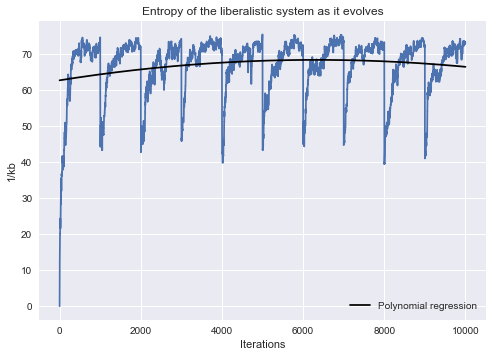

In [59]:
# Here we evaluate the entropy of the system and a polynomial regression of the second order 

#Finding the maxima for our bins
maxima = np.max(matrix[:, :])

entropylist = []

#making the entropy as a function of time, the "particles" are the agent value and we look at what bin they are in
for i in range(N):
    particles = matrix[i, :] #
    x,bins = np.histogram(particles,bins = 10,range = (0,maxima))
    print(x)
    omega = boltzmann(ant_agents,x)
    entropylist.append(entropy(omega))


    
# Making an x axis, this is strictly not necessary as each value has an index equal to the iteration, but it is better to be safe
xpoly = np.linspace(0,N,len(entropylist),dtype = int) 

# Calculating the value of the last iteration
omega = boltzmann(ant_agents,x)
print(f"The systems entropy at the last iteration is {entropy(omega)} 1/kb")



#plotting the entropy and making the regression
plt.plot(xpoly,entropylist)

m,c,n = np.polyfit(xpoly,entropylist,deg = 2)
regresjon = m*xpoly**2 + c*xpoly + n
plt.plot(xpoly,regresjon,"k", label="Polynomial regression")
plt.title("Entropy of the liberalistic system as it evolves")
plt.xlabel("Iterations")
plt.ylabel("1/kb")
plt.legend()

<h2> Scenarios <h2>

further we wish to develop the system a bit more, we are going to branch it out into 3 different scenarioes where the first scenario is to look at when there is a redistribution tax. It works in the following manner

First we set a median wealth which is calculated by $$\langle W \rangle = \frac{1}{N}\sum_{i=1}^N W_i$$
where N is the total number of agents, and $W_i$ is the wealth each agent has, moreover as the systemwealth never changes, we can be certain that the meadian wealth will never change either, as the median wealth is closely tied with the total systemwealth. This also mean that if the system wealth increases then the median wealth will also increase. In math this relation can be written as $$\langle W \rangle \quad \alpha \quad W_{tot}.$$

Moreover as for the actual distribution, we assume that if someone is over the wealth median then they will be taxed and then the taxes will go into the pockets of the other agents who are below the wealth median. There are different ways of determining how much one should take from the riches, but for now lets say that we take a certain percentage of their wealth. Moreover the redistribution to the poorest agents could also be done in a plethora of ways, we could either gove them a flat amount so that everyone gets an equal portion of the tax, regardless of how much they have. The other way is a little bit more complex, we sum the total amount of wealth from the agents below the mean wealth, then we look at the percentage that the individual agents have of that wealth and make an inverse relation where the agent with the least gets the most and the agent with the most money gets the least. In math this would look like 

$$W_b = \sum_{i=1} w_{i,b}$$
Further we would look at the different percentages
$$P_i = \frac{w_{i,b}}{W_b}$$
Moreover we wish to calculate how much of the total sum they should get 
$$m_i= 1-P_i$$
where $m_i$ is the amount of the tax that the individual would get.

## Periodic redistribution

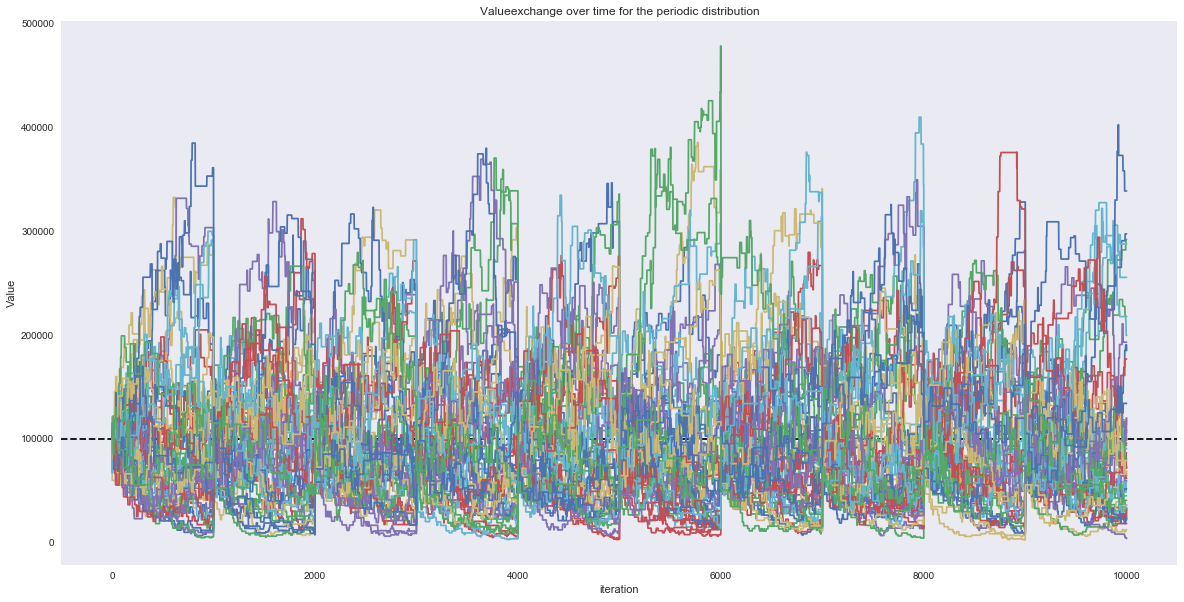

In [55]:
N = 10000
ant_agents = 50
tol = 1
sKapital = 100000


#Making the redistribution period
redistperiod = N/10 

matrix = np.zeros((N,ant_agents))

for i in range(ant_agents):
    matrix[0,i] = sKapital
indexagents = [i for i in range(ant_agents)]

counter = np.zeros(ant_agents)

totalmatrix = np.zeros_like(matrix)

# Here we trade in a for loop with a function



for i in range(N-1):
    matrix[i+1,:] = matrix[i,:]


    e1,e2 = elector(indexagents)
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]])
    matrix[i+1,e1] = newval1
    matrix[i+1,e2] = newval2

    counter[e1] +=1
    counter[e2] +=1


    #here we create the wealth redistribution.
    if i % redistperiod == 0: #Checks if i is multiple of redistperiod, if yes, SEIZE THE MEANS OF PRODUCTION BROTHER!
        underlist = []
        taxgainlist = []
        wmed = np.sum(matrix[i+1,:])/ant_agents

        alexcooper = list.copy(indexagents)# Må endre navn

        percent = 0.5 #5%
        redist_sum = 0
        for j in range(ant_agents):
            if matrix[i+1,j] > wmed:
                redist =percent * matrix[i+1,j]
                redist_sum += redist
                matrix[i+1,j] = matrix[i+1,j] - redist
                alexcooper.remove(j)

        #print(alexcooper)
        for elem in alexcooper:
            matrix[i+1,elem] = matrix[i+1,elem] + redist_sum/len(alexcooper)


  
    
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")
plt.title("Valueexchange over time for the periodic distribution")
plt.axhline(y = sKapital,color ="black", linestyle = "--")
for i in range(ant_agents):
    ax.plot(matrix[:,i])
    

    


Text(0.5, 1.0, 'Development of the distribution of value for the periodic redistribution')

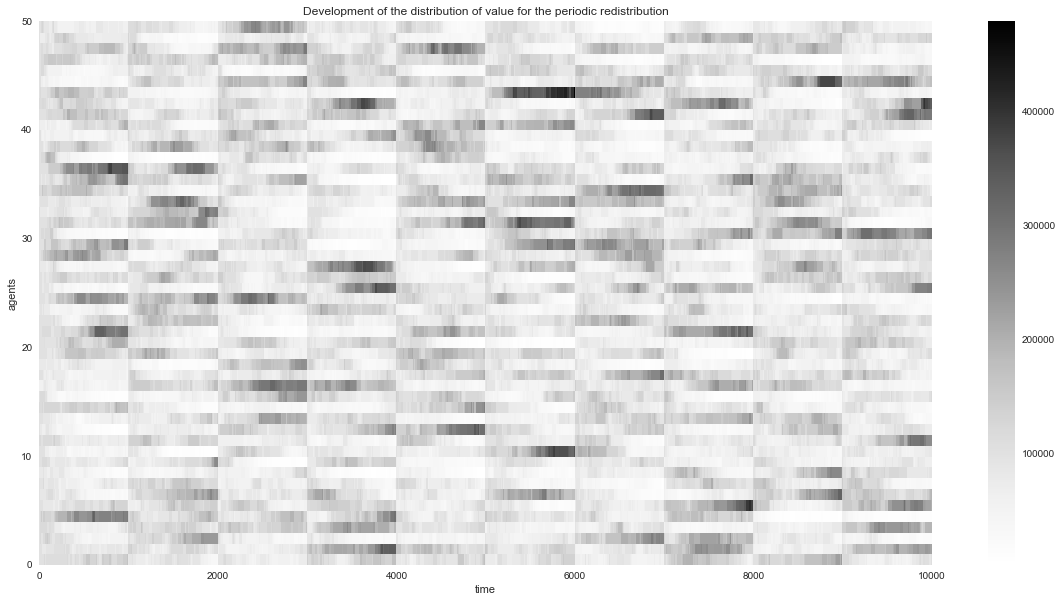

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
matrix_tr = np.transpose(matrix)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()
plt.title("Development of the distribution of value for the periodic redistribution")

0.0


Text(0, 0.5, '1/kb')

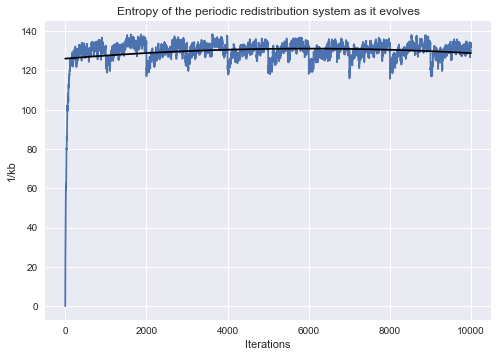

In [57]:
tot_cash = sKapital * ant_agents
levels = tot_cash/10 # number of energy levels for particels


particles = totalmatrix[-1, :] #50
x,bins = np.histogram(particles,bins = 100,range = (0,np.max(matrix[-1, :])))



omega = boltzmann(ant_agents,x)
print(entropy(omega))

entropylist = []
for i in range(N):
    particles = matrix[i, :] #50
    x,bins = np.histogram(particles,bins = 100,range = (0,np.max(matrix[:, :])))
    omega = boltzmann(ant_agents,x)
    entropylist.append(entropy(omega))
xpoly = np.linspace(0,10000,len(entropylist),dtype = int)
m,c,n = np.polyfit(xpoly,entropylist,deg = 2)
plt.plot(xpoly,entropylist, label= "Entropic value")
regresjon1 = m*xpoly**2 + xpoly*c+n
plt.plot(xpoly,regresjon1,"k", label="Polynomial regression")
plt.title("Entropy of the periodic redistribution system as it evolves")
plt.xlabel("Iterations")
plt.ylabel("1/kb")

## Universal basic income

 Mean number of times an agent is under the meanwealth5.7


Text(0.5, 1.0, 'Valueexchange over time for the universal basic income model')

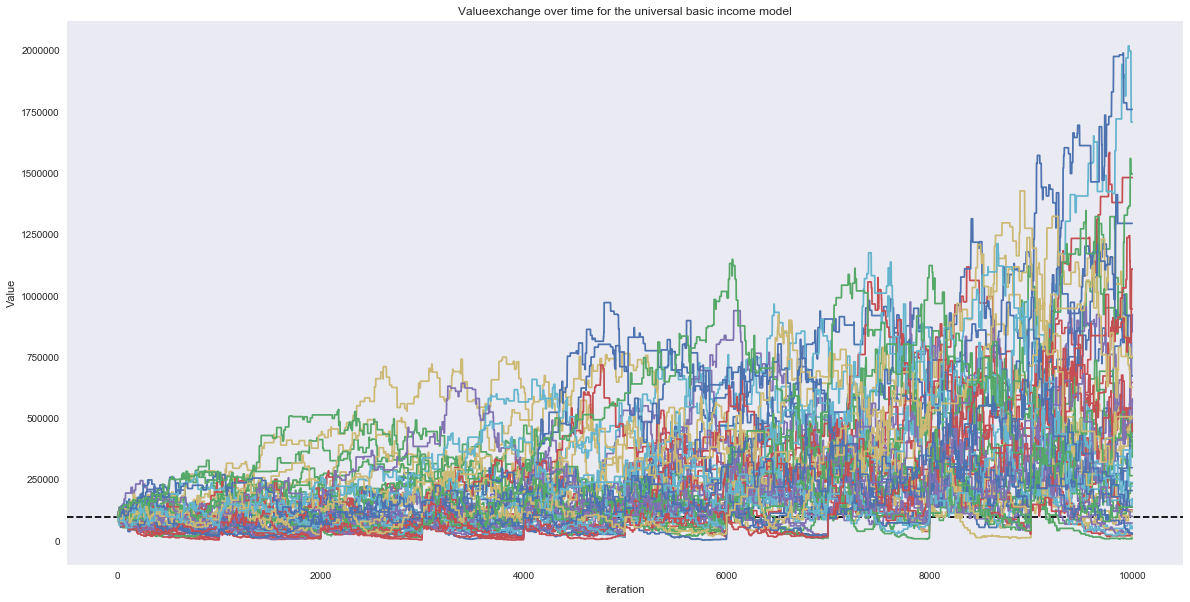

In [48]:
N = 10000 # Antall iterasjoner
ant_agents = 50 # Antall agenter
tol = 1 #Toleranse, ikke i bruk
sKapital = 100000 # Startskapital

wmed = sKapital

counter2 = 0 #



histlist = []


agentarr = np.zeros(ant_agents) # Agent array
redistperiod = N/10 # Antall redistribusjoner

wmedlist = [] # A tracker of the evoluton of the wealth median as more is distributed

matrix = np.zeros((N,ant_agents)) # Lager selve matrisen til utviklingen av verdi

for i in range(ant_agents):
    matrix[0,i] = sKapital # gir de alle en startkapital
indexagents = [i for i in range(ant_agents)] # En liste med indeksene til agentene

counter = np.zeros(ant_agents) # A counter of who wins, currently not in use

totalmatrix = np.zeros_like(matrix)
    

    
overlim = []
over = 0
underlim = []
under = 0
atlim = []
at = 0
# Here we trade in a for loop with a function
for i in range(N-1):
    matrix[i+1,:] = matrix[i,:] # value is transfered over from old iteration to new


    over, under,at = 0,0,0
    for k in matrix[i+1,:]:
        if k > wmed:
            over += 1
        elif k < wmed: 
            under +=1
        elif k == wmed:
            at += 1
    overlim.append(over)
    underlim.append(under)
    atlim.append(at)

    e1,e2 = elector(indexagents) # Elects two agents to trade
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]]) # Get new vaues
    matrix[i+1,e1] = newval1 # Update the new value
    matrix[i+1,e2] = newval2 # Same as above

    counter[e1] +=1 # Add 1 to the agent who traded
    counter[e2] +=1 # Same as above

    wmed = np.sum(matrix[i+1,:])/ant_agents # Update of welth median
    wmedlist.append(wmed) # Add the calculated value


    #here we create the wealth redistribution.
    if i % redistperiod == 0: #Checks if i is multiple of redistperiod, if yes, SEIZE THE MEANS OF PRODUCTION BROTHER!



        counter2 = 0


        percent = 1 #5%

        for j in range(ant_agents): # loop over every agent
            if matrix[i+1,j] < percent*wmed: # check if agent is under a percentage of the wealth median
                counter2 += 1 # Add to counter2 for each person under the median
                agentarr[j] += 1 # Add to see who is under the median so we can see how many times
                matrix[i+1,j] = matrix[i+1,j] + wmed*0.3 # Add a set percentage of the welth median to the poor agent

        #print(f"Agents over wmed = {counter2}, agents under = {ant_agents -counter2}") # Print number of agents under and over
        histlist.append(np.array([counter2,ant_agents - counter2])) # Add to a list so we can make a histogram later

    

    

    
fig, ax = plt.subplots(figsize=(20, 10)) # Plot them
ax.grid() # Grid
plt.ylabel("Value")
plt.xlabel("iteration")
#print(agentarr) # Print how many times our agents were under the median
print(f" Mean number of times an agent is under the meanwealth{np.sum(agentarr)/len(agentarr)}") # Mean amount of times beneath the median for n numbers of checks
plt.axhline(y = sKapital,color ="black", linestyle = "--")
for i in range(ant_agents):
    ax.plot(matrix[:,i])
plt.title("Valueexchange over time for the universal basic income model")


Text(0.5, 0, 'Iteration')

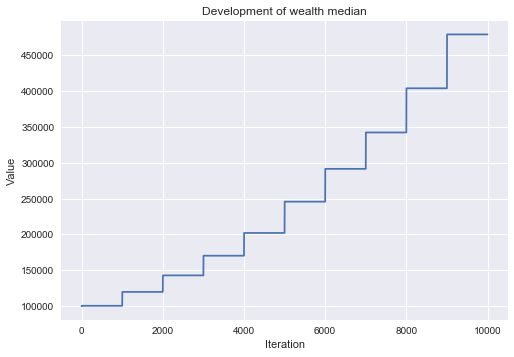

In [49]:
plt.plot(wmedlist)
plt.title("Development of wealth median")
plt.ylabel("Value")
plt.xlabel("Iteration")

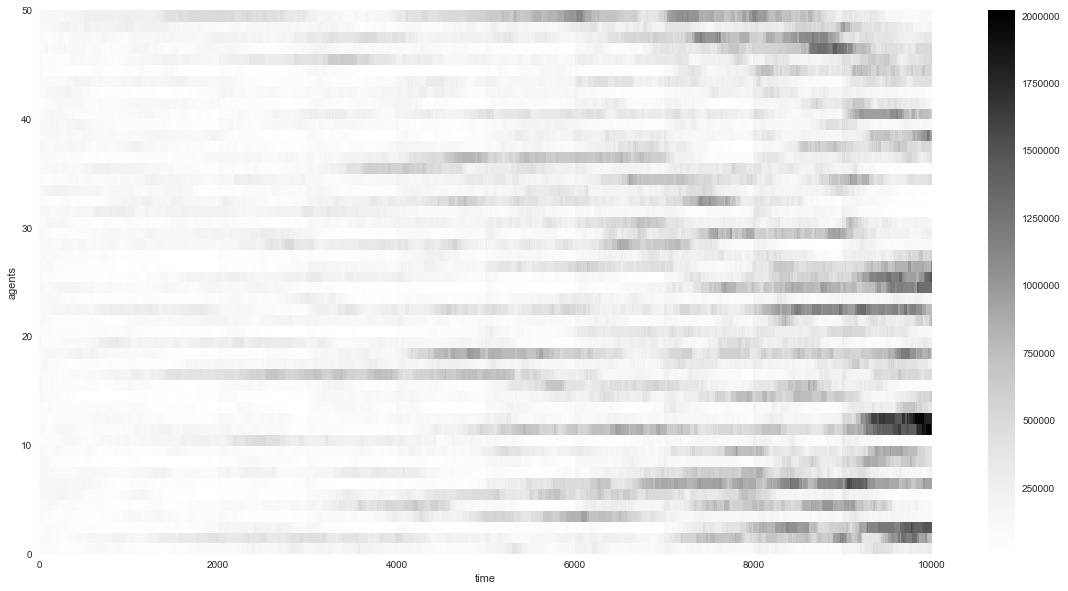

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
matrix_tr = np.transpose(matrix)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()

0.0


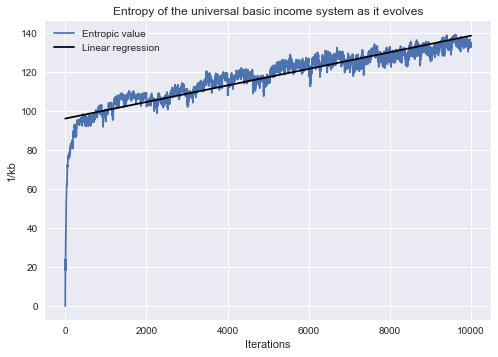

In [53]:
tot_cash = sKapital * ant_agents
levels = tot_cash/10 # number of energy levels for particels


particles = totalmatrix[-1, :] #50
x,bins = np.histogram(particles,bins = 100,range = (0,np.max(matrix[-1, :])))
plt.show()


omega = boltzmann(ant_agents,x)
print(entropy(omega))


entropylist = []
for i in range(N):
    particles = matrix[i, :] #50
    x,bins = np.histogram(particles,bins = 100,range = (0,np.max(matrix[:, :])))
    omega = boltzmann(ant_agents,x)
    entropylist.append(entropy(omega))


m,c = np.polyfit(xpoly,entropylist,deg = 1)
plt.plot(xpoly,entropylist,label = "Entropic value")
regresjon2 = m*xpoly + c
plt.plot(xpoly,regresjon2,"k",label = "Linear regression")
plt.title("Entropy of the universal basic income system as it evolves")
plt.xlabel("Iterations")
plt.ylabel("1/kb")
plt.legend()

## Wealth removal


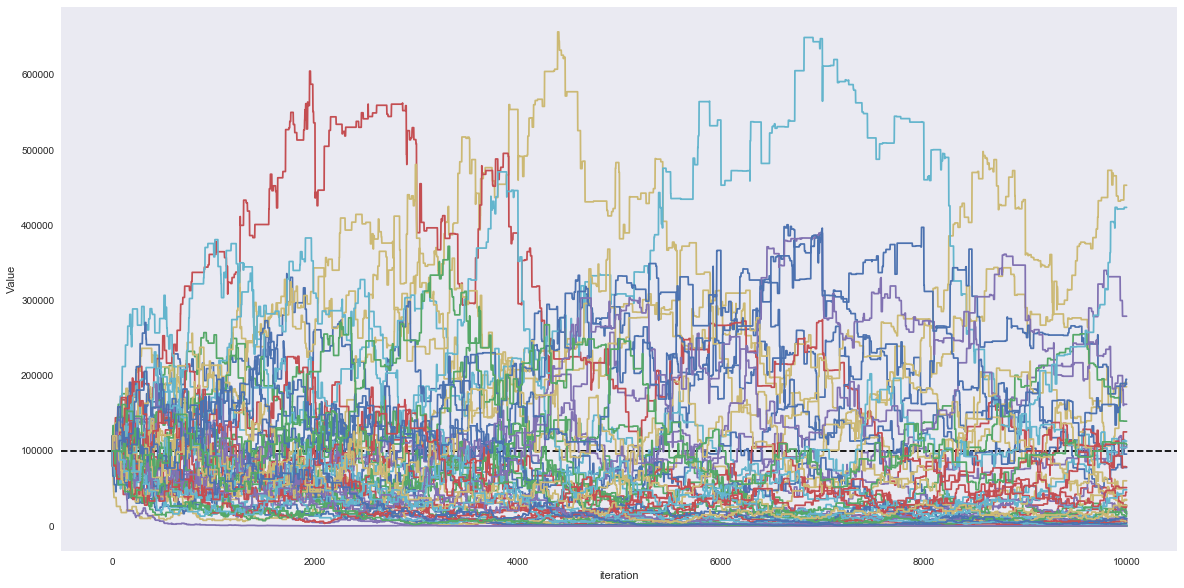

In [17]:
ant_agents = 50 # number of agents
tol = 1
sKapital = 100000 #start capital

redistperiod = N/10 # interval for redistribution

wmedlist = []

matrix = np.zeros((N,ant_agents))

for i in range(ant_agents):
    matrix[0,i] = sKapital #giving all agents start capital
indexagents = [i for i in range(ant_agents)] #indexing each agent

counter = np.zeros(ant_agents)

totalmatrix = np.zeros_like(matrix)



# Here we trade in a for loop with a function
for i in range(N-1):
    matrix[i+1,:] = matrix[i,:]


    e1,e2 = elector(indexagents) #choosing two agents to conduct a trade
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]]) #calculating new wealth
    matrix[i+1,e1] = newval1 #updating wealth for chosen angents
    matrix[i+1,e2] = newval2

    counter[e1] +=1 
    counter[e2] +=1

    wmed = np.sum(matrix[i+1,:])/ant_agents #calculating wealth median
    wmedlist.append(wmed) #logging wealth median per time


    #here we create the wealth redistribution.
    if i % redistperiod == 0: #Checks if i is multiple of redistperiod, if yes, SEIZE THE MEANS OF PRODUCTION COMERADE!


        percent = 3 #5%

        #stealing money from the rich, Robin Hood style
        for j in range(ant_agents):
            if matrix[i+1,j] > (1+percent)*wmed: # checking if agent > wealth median
                matrix[i+1,j] = matrix[i+1,j] - wmed*1 # stealing

    


    
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")

plt.axhline(y = sKapital,color ="black", linestyle = "--")
for i in range(ant_agents):
    ax.plot(matrix[:,i])

0.0


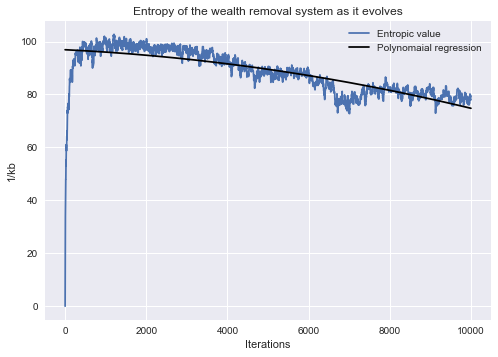

In [18]:
tot_cash = sKapital * ant_agents
levels = tot_cash/10 # number of energy levels for particels


particles = totalmatrix[-1, :] #50
x,bins = np.histogram(particles,bins = 30,range = (0,np.max(matrix[-1, :])))
plt.show()


omega = boltzmann(ant_agents,x)
print(entropy(omega))


entropylist = []
for i in range(N):
    particles = matrix[i, :] #50
    x,bins = np.histogram(particles,bins = 30,range = (0,np.max(matrix[:, :])))
    omega = boltzmann(ant_agents,x)
    entropylist.append(entropy(omega))

m,c,n = np.polyfit(xpoly,entropylist,deg = 2)
plt.plot(xpoly,entropylist,label = "Entropic value")
regresjon3 = m*xpoly**2 + c*xpoly + n
plt.plot(xpoly,regresjon3,"k", label= "Polynomaial regression")
plt.title("Entropy of the wealth removal system as it evolves")
plt.xlabel("Iterations")
plt.ylabel("1/kb")
plt.legend()

Neste scenario, vi prøver å bygge opp den fattigste, om man er over en rikdomsgrense så går pengene man tjener ikke til seg selv, men til den fattigste agenten, derved får man bygget dem opp og man kan ikke blir "rikere"

## Wealth limit (softcap)

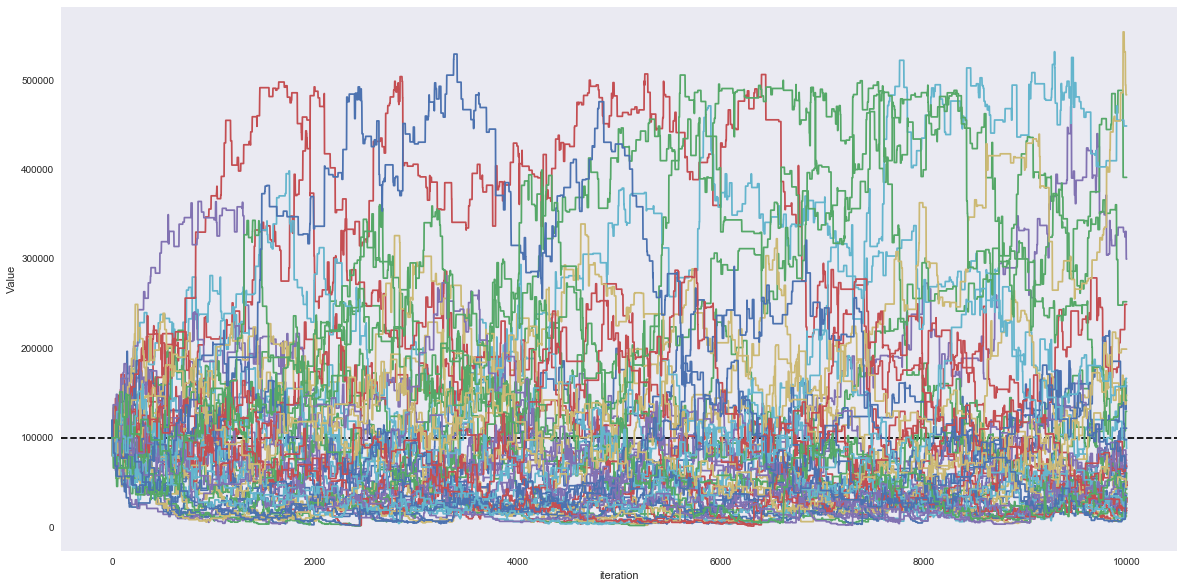

In [19]:
ant_agents = 50 # number of agents
sKapital = 100000 #start capital
wmed = sKapital


# Lim is the wealthlimit and percent is the percent of wealth redistributed
lim = 5
percent = 0.05

#Making the matrix
matrix = np.zeros((N,ant_agents))


#Filling it with the inital values
for i in range(ant_agents):
    matrix[0,i] = sKapital #giving all agents start capital
indexagents = [i for i in range(ant_agents)] #indexing each agent


overlim = []
over = 0
underlim = []
under = 0
atlim = []
at = 0





    

# Here we trade in a for loop with a function
for i in range(N-1):
    matrix[i+1,:] = matrix[i,:]


    over, under,at = 0,0,0
    for k in matrix[i+1,:]:
        if k > wmed:
            over += 1
        elif k < wmed: 
            under +=1
        elif k == wmed:
            at += 1
    overlim.append(over)
    underlim.append(under)
    atlim.append(at)

    e1,e2 = elector(indexagents) #choosing two agents to conduct a trade
    newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]]) #calculating new wealth
    matrix[i+1,e1] = newval1 #updating wealth for chosen angents
    matrix[i+1,e2] = newval2

    for elem in [e1,e2]: # loops over the two elements
        if matrix[i+1,elem] >= lim* wmed: # If one of them is above 5 times the median then proceed
            poorindex = np.argmin(matrix[i+1,:]) # Finding the index of the poorest agent
            matrix[i+1,poorindex] += percent*matrix[i+1,elem] # Giving som of the wealth to the poor agent
            matrix[i+1,elem] -= percent*matrix[i+1,elem] # Removing said wealth 


fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")



plt.axhline(y = sKapital,color ="black", linestyle = "--")
for i in range(ant_agents):
    ax.plot(matrix[:,i])

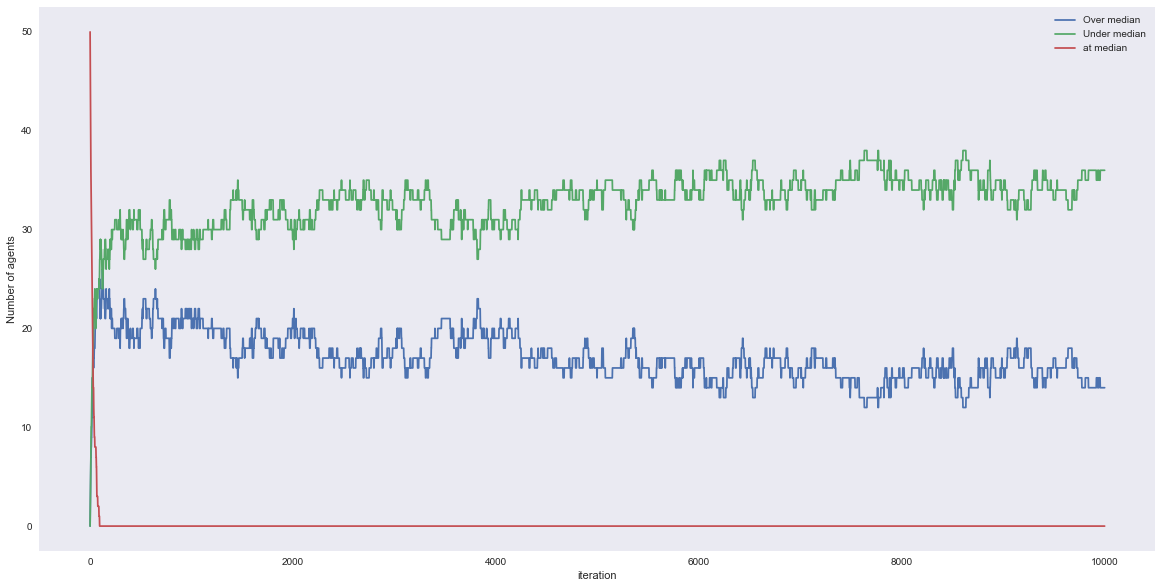

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Number of agents")
plt.xlabel("iteration")
ax.plot(overlim, label ="Over median")
ax.plot(underlim, label = "Under median")
ax.plot(atlim,label = "at median")
plt.legend()

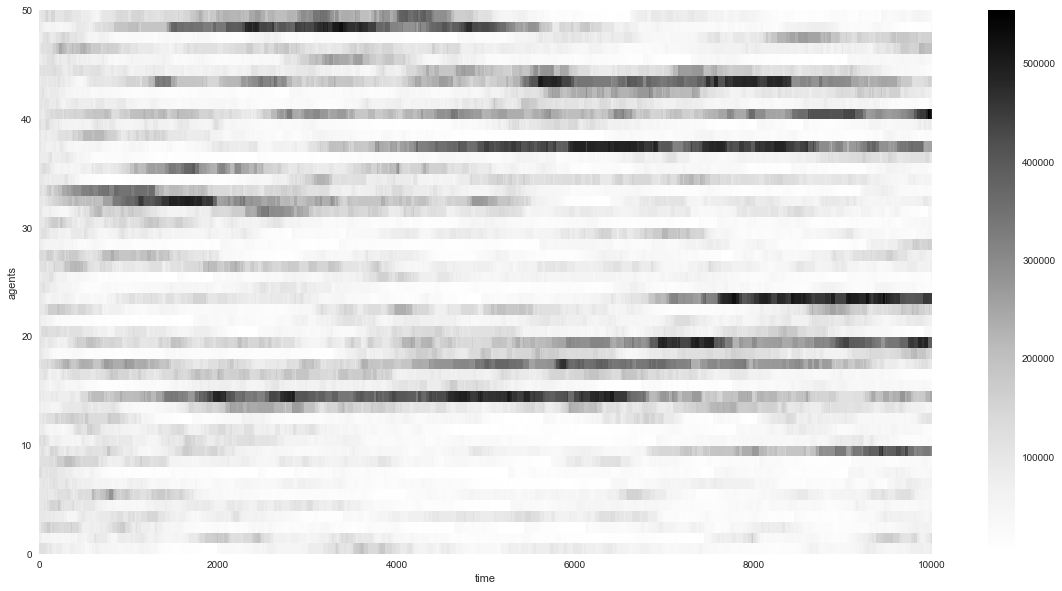

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
matrix_tr = np.transpose(matrix)
plt.pcolormesh(matrix_tr)
plt.xlabel("time")
plt.ylabel("agents")
plt.colorbar()

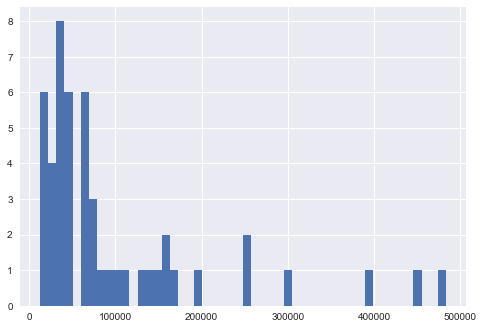

'\nLook at the entropy by using the 50 agents and not quanta of money. \nEach microstate is a multiple of the median. Defining 10 bins with 1/10 of the total wealth as width.\n\n\n'

In [22]:
#Boltzmann entropy
# each quanta of money is analogue to a distinguishable particel
#finding number of microstates using median as "energy intervals" 
tot_cash = sKapital * ant_agents
levels = tot_cash/10 # number of energy levels for particels


particles = matrix[-1, :] #50
plt.hist(particles, bins = 50)
x,bins = np.histogram(particles,bins = 30,range = (0,np.max(matrix[-1, :])))
plt.show()



"""
Look at the entropy by using the 50 agents and not quanta of money. 
Each microstate is a multiple of the median. Defining 10 bins with 1/10 of the total wealth as width.


"""

99.17121984867954


Text(0.5, 1.0, 'Entropy of the wealth limit system as it evolves')

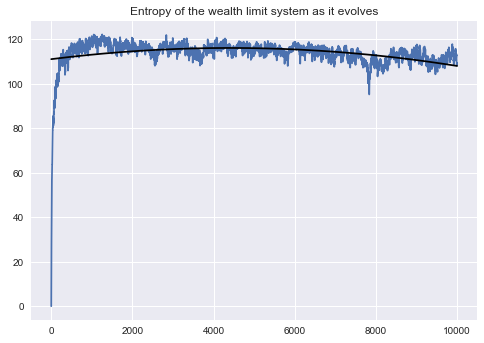

In [23]:
omega = boltzmann(ant_agents,x)
print(entropy(omega))

entropylist = []
for i in range(N):
    particles = matrix[i, :] #50
    x,bins = np.histogram(particles,bins = 50,range = (0,np.max(matrix[:, :])))
    omega = boltzmann(ant_agents,x)
    entropylist.append(entropy(omega))
    
m,c,n = np.polyfit(xpoly,entropylist,deg = 2)
plt.plot(entropylist)
regresjon4 = m*xpoly**2 + xpoly*c+n
plt.plot(xpoly,regresjon4,"k")

plt.title("Entropy of the wealth limit system as it evolves")

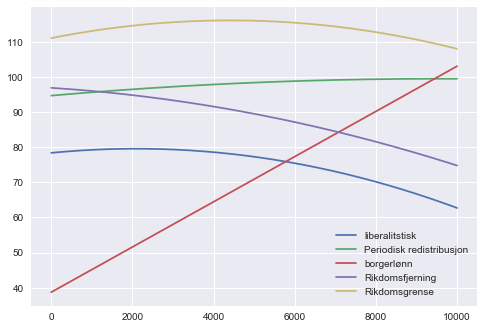

In [24]:
plt.plot(xpoly,regresjon, label = "liberalitstisk")
plt.plot(xpoly,regresjon1, label = "Periodisk redistribusjon")
plt.plot(xpoly,regresjon2, label = "borgerlønn")
plt.plot(xpoly,regresjon3, label = "Rikdomsfjerning")
plt.plot(xpoly,regresjon4, label = "Rikdomsgrense")
plt.legend()